# Introduction to Networks with Networkx

In [1]:
import networkx as nx

## Initialize new graph.
G = nx.Graph()

## Generating Graphs Manually 
### Adding Nodes

In [2]:
## Manually adding nodes: one at a time.
G.add_node('Alpha')

In [3]:
## Manually adding nodes: multiple at once.
G.add_nodes_from(['Beta','Gamma','Delta','Kappa','Lambda'])

In [4]:
## Return current nodes.
G.nodes()

['Alpha', 'Beta', 'Gamma', 'Delta', 'Kappa', 'Lambda']

### Adding Edges

In [5]:
## Manually adding edges: one at a time.
G.add_edge('Alpha','Beta')

In [6]:
## Manually adding edges: multiple at once.
G.add_edges_from([('Alpha','Gamma'), 
                  ('Alpha','Delta')])

In [7]:
## Manually adding edges: weighted edges.
G.add_weighted_edges_from([('Alpha','Kappa',0.1), 
                           ('Alpha','Lambda',0.5)])

In [8]:
## Set graph to undirected.
G = G.to_undirected()

In [9]:
## Return current weights.
G.edges(data=True)

[('Alpha', 'Beta', {}),
 ('Alpha', 'Gamma', {}),
 ('Alpha', 'Delta', {}),
 ('Alpha', 'Kappa', {'weight': 0.1}),
 ('Alpha', 'Lambda', {'weight': 0.5})]

## Generating Graphs from Datasets
Networkx supports reading graphs from and writing graphs to a [wide variety of formats](https://networkx.github.io/documentation/networkx-1.9.1/reference/readwrite.html).
### From Edgelist

In [10]:
import os

## From from edgelist.
G = nx.read_weighted_edgelist(os.path.join('lesmiserables','edgelist.txt'))
G.edges(data=True)[:5]

[('Napoleon', 'Myriel', {'weight': 1.0}),
 ('Myriel', 'MlleBaptistine', {'weight': 8.0}),
 ('Myriel', 'MmeMagloire', {'weight': 10.0}),
 ('Myriel', 'CountessDeLo', {'weight': 1.0}),
 ('Myriel', 'Geborand', {'weight': 1.0})]

### From NumPy Array

In [11]:
import numpy as np

## Load NumPy compressed file.
npz = np.load(os.path.join('lesmiserables','adjmat.npz'))

## Make graph from adjacency matrix.
G = nx.from_numpy_matrix(npz['adjmat'])
print(G.edges(data=True)[:5])

## Gives nodes names.
node_labels = dict()
for n, label in enumerate(npz['labels']):
    node_labels[n] = label
    
nx.set_node_attributes(G, 'label', node_labels)
print(G.nodes(data=True)[:5])

[(0, 1, {'weight': 1.0}), (1, 2, {'weight': 8.0}), (1, 3, {'weight': 10.0}), (1, 4, {'weight': 1.0}), (1, 5, {'weight': 1.0})]
[(0, {'label': 'Napoleon'}), (1, {'label': 'Myriel'}), (2, {'label': 'MlleBaptistine'}), (3, {'label': 'MmeMagloire'}), (4, {'label': 'CountessDeLo'})]


### From Pandas DataFrame

In [12]:
from pandas import read_csv

## Load DataFrame.
df = read_csv(os.path.join('lesmiserables','edgelist.csv'))
df.head(5)

,source,target,weight
0,Napoleon,Myriel,1
1,MlleBaptistine,Myriel,8
2,MmeMagloire,Myriel,10
3,MmeMagloire,MlleBaptistine,6
4,CountessDeLo,Myriel,1


In [13]:
## Convert to graph.
G = nx.from_pandas_dataframe(df, 'source', 'target', edge_attr=['weight'])

## Gives nodes names.
node_labels = dict()
for label in G.nodes():
    node_labels[label] = label
nx.set_node_attributes(G, 'label', node_labels)

G.edges(data=True)[:5]

[('Napoleon', 'Myriel', {'weight': 1}),
 ('Myriel', 'MlleBaptistine', {'weight': 8}),
 ('Myriel', 'MmeMagloire', {'weight': 10}),
 ('Myriel', 'CountessDeLo', {'weight': 1}),
 ('Myriel', 'Geborand', {'weight': 1})]

### Converting Graphs to Other Structures

In [14]:
## Networkx makes it easy to convert graphs to other structures.
nx.to_edgelist;
nx.to_numpy_matrix;
nx.to_scipy_sparse_matrix;
nx.to_pandas_dataframe;

## Generating Special &  Random Graphs
Networkx supports many [types of graphs](https://networkx.github.io/documentation/development/reference/classes.html), including bipartite graphs and beyond. Moreover, Networkx has many [built-in functions](https://networkx.github.io/documentation/development/reference/generators.html) for generating special classes of graphs and random graphs.

In [15]:
nx.random_graphs?
RG = nx.random_regular_graph(d=5, n=100, seed=47404)
print('n_nodes = %s; n_edges = %s' %(RG.number_of_nodes(), RG.number_of_edges()))

n_nodes = 100; n_edges = 250


## Computing Graph Metrics
A full list of metrics (there are many!) can be found [here](https://networkx.github.io/documentation/development/reference/algorithms.html).

### Graph Size & Attributes

In [16]:
print('n_nodes =     %s' %G.number_of_nodes())
print('n_edges =     %s' %G.number_of_edges())
print('n_selfloops = %s' %G.number_of_selfloops())

n_nodes =     77
n_edges =     254
n_selfloops = 0


In [17]:
## Unweighted node degree.
degree_unweighted = G.degree()

## Weighted node degree.
degree_weighted = G.degree(weight='weight')

## Lookup Javert.
print('Javert (unweighted) = %s' %degree_unweighted['Javert'])
print('Javert (weighted)   = %s' %degree_weighted['Javert'])

Javert (unweighted) = 17
Javert (weighted)   = 47


### Subgraphs & Connected Components

In [18]:
## Checking for connected components and subgraphs.
## The Les Miserables graph has only 1 major component.
subgraphs = nx.connected_component_subgraphs(G)
for subgraph in subgraphs:
    print(subgraph.size())

254


### Centrality

In [19]:
## Set to undirected.
G = G.to_undirected()

## Compute unweighted degree centrality.
degree_centrality = nx.degree_centrality(G)

## Compute eigenvector centrality.
eigenvector_centrality = nx.eigenvector_centrality(G)

## Compute betweeness centrality.
betweenness_centrality = nx.betweenness_centrality(G)

## Store as attributes.
for metric, label in zip([degree_centrality,eigenvector_centrality,betweenness_centrality],
                         ['degree','eigenvector','betweenness']):
    nx.set_node_attributes(G, label, metric)
    
G.nodes(data=True)[:3]

[('Napoleon',
  {'betweenness': 0.0,
   'degree': 0.013157894736842105,
   'eigenvector': 0.0006674025949642703,
   'label': 'Napoleon'}),
 ('Myriel',
  {'betweenness': 0.17684210526315788,
   'degree': 0.13157894736842105,
   'eigenvector': 0.04340057857925971,
   'label': 'Myriel'}),
 ('MlleBaptistine',
  {'betweenness': 0.0,
   'degree': 0.039473684210526314,
   'eigenvector': 0.029165185068246773,
   'label': 'MlleBaptistine'})]

### Shortest Paths

In [20]:
## Compute average shortest path length.
nx.average_shortest_path_length(G)

2.6411483253588517

In [21]:
## Compute shortest paths.
shortest_paths = nx.shortest_path_length(G)

for character in ['Valjean', 'Fantine', 'Napoleon']:
    sp = shortest_paths['Javert'][character]
    print('Shortest path from Javert to %s: %s' %(character,sp))

Shortest path from Javert to Valjean: 1
Shortest path from Javert to Fantine: 1
Shortest path from Javert to Napoleon: 3


### Clustering

In [22]:
## Count triangles.
triangles = nx.triangles(G)

print('Triangles (Javert)  = %s' %triangles['Javert'])
print('Triangles (average) = %0.3f' %np.mean( list(triangles.values()) ))

Triangles (Javert)  = 44
Triangles (average) = 18.195


In [23]:
## Clustering coefficient.
clustering_coef = nx.clustering(G)

print('Clustering (Javert)  = %0.3f' %clustering_coef['Javert'])
print('Clustering (average) = %0.3f' %np.mean( list(clustering_coef.values()) ))

Clustering (Javert)  = 0.324
Clustering (average) = 0.573


In [24]:
for clique in nx.find_cliques(G):
    if 'Javert' in clique:
        print(clique)

['Valjean', 'Javert', 'Simplice', 'Fantine']
['Valjean', 'Javert', 'Thenardier', 'Fantine', 'MmeThenardier']
['Valjean', 'Javert', 'Thenardier', 'Cosette', 'MmeThenardier']
['Valjean', 'Javert', 'Thenardier', 'Babet', 'Gueulemer', 'MmeThenardier', 'Claquesous']
['Valjean', 'Javert', 'Thenardier', 'Babet', 'Gueulemer', 'Montparnasse', 'Gavroche']
['Valjean', 'Javert', 'Thenardier', 'Babet', 'Gueulemer', 'Montparnasse', 'Claquesous']
['Valjean', 'Javert', 'Fauchelevent']
['Valjean', 'Javert', 'Enjolras', 'Gavroche']
['Valjean', 'Javert', 'Enjolras', 'Claquesous']
['Valjean', 'Javert', 'Bamatabois', 'Fantine']
['Valjean', 'Javert', 'Woman1']
['Valjean', 'Javert', 'Toussaint', 'Cosette']
['Valjean', 'Javert', 'Woman2', 'Cosette']


## Visualizing Graphs
The [documentation](https://networkx.readthedocs.io/en/networkx-1.11/reference/drawing.html) for drawing and visualizing plots provides many examples for representing complex graphs with notable attributes.

### Simple Graph

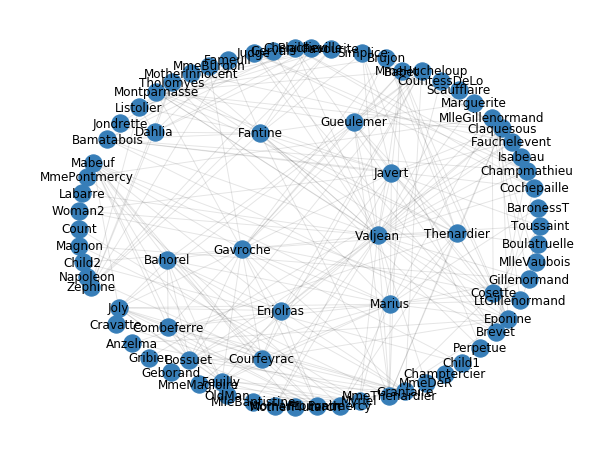

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

## Open canvas.
fig = plt.figure(figsize=(10,8))

## Choose layout.
pos = nx.spring_layout(G, k=5./np.sqrt(G.number_of_nodes()))

## Draw nodes.
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='#377eb8')

## Draw edges.
ax = nx.draw_networkx_edges(G, pos, alpha=0.1)

## Draw labels.
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G,'label'))

ax.axes.axis('off');

### Complex Graphs

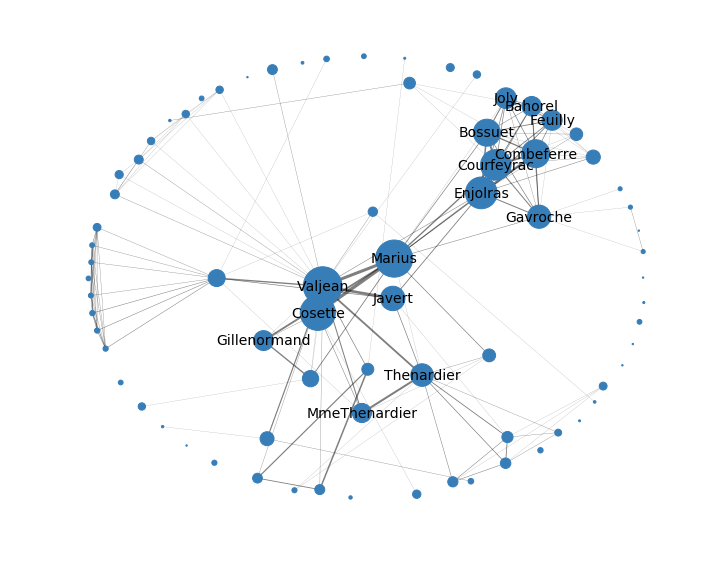

In [26]:
## Define parameters.
spring_constant = 2.5
node_color = '#377eb8'
node_scale = 1.5e3
edge_scale = 5
font_scale = 0.24
font_size = 14

## Define useful functions.
def normalize(arr):
    arr = np.array(list(arr))
    return (arr - arr.min()) / (arr.max() - arr.min())

## Open canvas.
fig = plt.figure(figsize=(10,8))

## Choose layout.
pos = nx.spring_layout(G, k=spring_constant/np.sqrt(G.number_of_nodes()))

## Draw nodes (weighted by eigenvector centrality).
node_size = normalize( eigenvector_centrality.values() )
nx.draw_networkx_nodes(G, pos, node_size=node_size*node_scale, node_color=node_color)

## Draw edges (weighted by normalized weight).
weights = nx.get_edge_attributes(G,'weight')
weights_norm = normalize( weights.values() )
ax = nx.draw_networkx_edges(G, pos, width=weights_norm*edge_scale, alpha=0.5)

## Draw labels (weighted by eigenvector centrality).
labels = nx.get_node_attributes(G,'label')
for node, size in zip(G.nodes(), node_size):
    if size < font_scale: labels.pop(node)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=font_size)
        
ax.axes.axis('off');
plt.tight_layout()